In [35]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
import statsmodels.api as sm
from pandas_profiling import ProfileReport 
%matplotlib inline

In [36]:
training = pd.read_csv('processedTrain.csv')
testing = pd.read_csv('processedTest.csv')
datasets = [training,testing]

In [37]:
training['unique_id'] = training.index + 1
testing['unique_id'] = testing.index + 1

In [38]:
cloudpred = training.drop('AVERAGE_SPEED_DIFF',axis=1)

In [39]:
cloudTrain = pd.concat([cloudpred[cloudpred['AVERAGE_CLOUDINESS'] != 'NoData'],testing[testing['AVERAGE_CLOUDINESS'] != 'NoData']])

In [40]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek 

In [41]:
X = cloudTrain.drop('AVERAGE_CLOUDINESS',axis=1)
y = cloudTrain['AVERAGE_CLOUDINESS']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=2021,stratify=y)

In [43]:
sm = BorderlineSMOTE(kind='borderline-2')
X_res, y_res = sm.fit_resample(X_train, y_train)

In [44]:
#sme = SMOTEENN(sampling_strategy='not majority')
#X_res, y_res = sme.fit_resample(X_train, y_train)

In [45]:

#ros = RandomOverSampler(sampling_strategy="not majority",random_state=2021)
#X_res, y_res = ros.fit_resample(X_train, y_train)

In [46]:
#smt = SMOTETomek(sampling_strategy='auto')
#X_res, y_res = smt.fit_resample(X_train, y_train)

In [47]:
#X_res=X_train
#y_res = y_train

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier


In [49]:
classifiers = [
    LogisticRegression(solver='liblinear'),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
    SVC(),
    #GaussianProcessClassifier(random_state=2021),
    #XGBClassifier()
    ]

In [50]:
for i in classifiers:
    model = i
    print('______________________________________________')
    print(i)
    print('..............................................')
    cv = cross_val_score(model,X_res,y_res,cv=5,n_jobs=-1,)
    model.fit(X_res,y_res)
    test_score = model.score(X_test, y_test)
    print('Folds: ',cv)
    print('Accuracy score: ',cv.mean()*100)
    print('Test Accuracy score: ',test_score*100)


______________________________________________
LogisticRegression(solver='liblinear')
..............................................
Folds:  [0.5920904  0.61016949 0.62146893 0.66779661 0.63800905]
Accuracy score:  62.59068947005139
Test Accuracy score:  63.84105960264901
______________________________________________
RandomForestClassifier()
..............................................
Folds:  [0.70734463 0.71977401 0.76158192 0.81468927 0.72850679]
Accuracy score:  74.63793235677582
Test Accuracy score:  73.37748344370861
______________________________________________
KNeighborsClassifier()
..............................................
Folds:  [0.39661017 0.4180791  0.44067797 0.51186441 0.43099548]
Accuracy score:  43.96454227062403
Test Accuracy score:  39.80132450331126
______________________________________________
DecisionTreeClassifier()
..............................................
Folds:  [0.58418079 0.6        0.62146893 0.67683616 0.63122172]
Accuracy score:  62.2741519

In [51]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [52]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [53]:
'''param_grid =  {'n_estimators': [50,100,200,300,400,500,600,700,800,900,1000],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')'''


"param_grid =  {'n_estimators': [50,100,200,300,400,500,600,700,800,900,1000],\n               'criterion':['gini','entropy'],\n                                  'bootstrap': [True,False],\n                                  'max_depth': [3,5,10,20,50,75,100,None],\n                                  'max_features': ['auto','sqrt'],\n                                  'min_samples_leaf': [1,2,4,10],\n                                  'min_samples_split': [2,5,10]}\n                                  \nclf_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions= param_grid,cv = 5, verbose = True, n_jobs = -1)\nbest_clf_rf = clf_rf.fit(X_res,y_res)\nclf_performance(best_clf_rf,'Random Forest')"

In [54]:
param_grid =  {'n_estimators': [600],
               'min_samples_split': [2],
               'min_samples_leaf': [1],
               'max_features': ['sqrt'],
               'max_depth': [50],
               'criterion': ['gini'],
               'bootstrap': [False]}
                                  
clf_rf = GridSearchCV(RandomForestClassifier(), param_grid= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.3s finished


Random Forest
Best Score: 0.7554196385203364
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}


<AxesSubplot:>

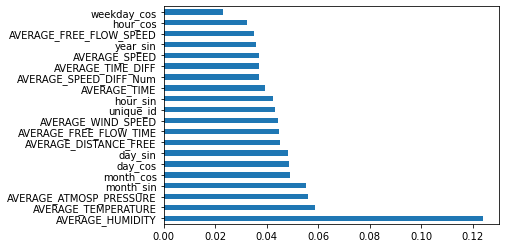

In [55]:
best_rf = best_clf_rf.best_estimator_.fit(X_res,y_res)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

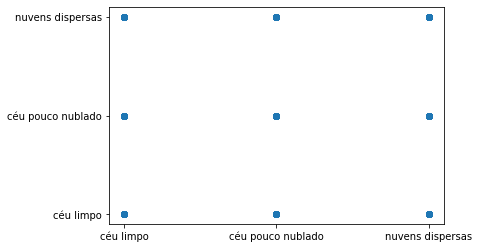

In [56]:
predictions = best_clf_rf.predict(X_test)
plt.scatter(y_test,predictions)

In [57]:
from sklearn.metrics import confusion_matrix

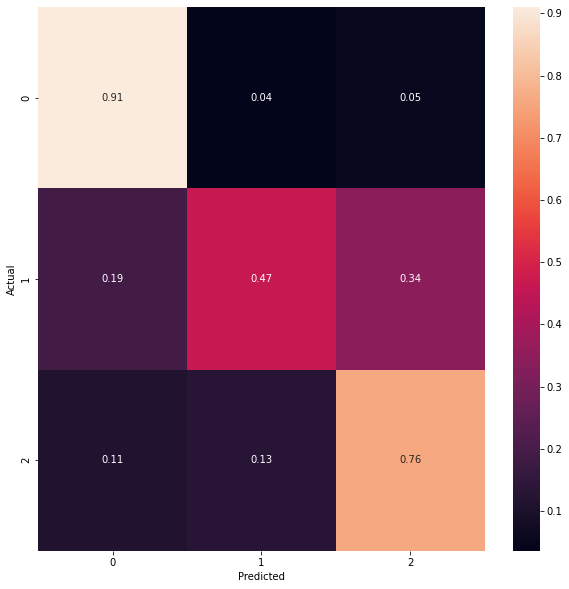

In [67]:
y_pred = best_clf_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [59]:
nanCloudTrain = training[training['AVERAGE_CLOUDINESS'] == 'NoData']

cloudTrain = training[training['AVERAGE_CLOUDINESS'] != 'NoData']

nanCloudTest = testing[testing['AVERAGE_CLOUDINESS'] == 'NoData']

cloudTest = testing[testing['AVERAGE_CLOUDINESS'] != 'NoData']


In [60]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_FREE_FLOW_SPEED  4424 non-null   float64
 1   AVERAGE_TIME_DIFF        4424 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   4424 non-null   float64
 3   AVERAGE_TEMPERATURE      4424 non-null   float64
 4   AVERAGE_ATMOSP_PRESSURE  4424 non-null   float64
 5   AVERAGE_HUMIDITY         4424 non-null   float64
 6   AVERAGE_WIND_SPEED       4424 non-null   float64
 7   AVERAGE_RAIN             4424 non-null   int64  
 8   is_weekend               4424 non-null   int64  
 9   AVERAGE_DISTANCE_FREE    4424 non-null   float64
 10  AVERAGE_TIME             4424 non-null   float64
 11  AVERAGE_SPEED            4424 non-null   float64
 12  AVERAGE_SPEED_DIFF_Num   4424 non-null   float64
 13  weekday_sin              4424 non-null   float64
 14  weekday_cos             

In [61]:
trainPred = best_clf_rf.predict(nanCloudTrain.drop(['AVERAGE_SPEED_DIFF','AVERAGE_CLOUDINESS'],axis=1))

testPred = best_clf_rf.predict(nanCloudTest.drop('AVERAGE_CLOUDINESS',axis=1))

In [62]:
nanCloudTrain['AVERAGE_CLOUDINESS'] = trainPred
nanCloudTest['AVERAGE_CLOUDINESS'] = testPred

/tmp/ipykernel_1963/3220737146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nanCloudTrain['AVERAGE_CLOUDINESS'] = trainPred
/tmp/ipykernel_1963/3220737146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nanCloudTest['AVERAGE_CLOUDINESS'] = testPred


In [63]:
training2 = pd.concat([nanCloudTrain, cloudTrain], ignore_index=True).sort_values(by='unique_id',ascending=True)

testing2 = pd.concat([nanCloudTest, cloudTest], ignore_index=True).sort_values(by='unique_id',ascending=True)


In [64]:
training2 = training2.drop('unique_id',axis=1)
testing2 = testing2.drop('unique_id',axis=1)

In [65]:
training2 = pd.concat([training2,pd.get_dummies(training2['AVERAGE_CLOUDINESS'])],axis='columns').drop(['AVERAGE_CLOUDINESS'],axis='columns')

testing2 = pd.concat([testing2,pd.get_dummies(testing2['AVERAGE_CLOUDINESS'])],axis='columns').drop(['AVERAGE_CLOUDINESS'],axis='columns')

In [66]:
training2.to_csv('cloudProcessedTrain.csv',index=False)
testing2.to_csv('cloudProcessedTest.csv',index=False)